In [1]:
# importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from matplotlib import rcParams
warnings.filterwarnings("ignore") # retirar mensagens de alterações futuras

In [2]:
# configurando os plots do MatplotLib
rcParams['figure.figsize'] = 10, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large' 
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
# carregando dataset
data = pd.read_csv("State_of_data_2022.csv")

In [9]:
data.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

In [8]:
# aplicação de regex para separar as pesquisas em datasets menores, o regex retorna os 5 primeiros caracteres da coluna que contem o título da pesquisa e assim contando a quantidade de colunas de cada uma dessas pesquisas
pesquisa = []
for i in data.columns:
    p = re.match(r"(.{1,4})",i).group(1) # esse regex foi feito com auxílio do ChatGPT
    pesquisa.append(p)
p1 = pesquisa.count("('P1")
p2 = pesquisa.count("('P2")
p3 = pesquisa.count("('P3")
p4 = pesquisa.count("('P4")
p5 = pesquisa.count("('P5")
p6 = pesquisa.count("('P6")
p7 = pesquisa.count("('P7")
p8 = pesquisa.count("('P8")
print("Pesquisa 1:",p1,"coluna 1 a", p1)
print("Pesquisa 2:",p2," coluna",p1+1,"a",p1+p2)
print("Pesquisa 3:",p3," coluna",p1+p2+1,"a",p1+p2+p3)
print("Pesquisa 4:",p4," coluna",p1+p2+p3+1,"a",p1+p2+p3+p4)
print("Pesquisa 5:",p5," coluna",p1+p2+p3+p4+1,"a",p1+p2+p3+p4+p5)
print("Pesquisa 6:",p6," coluna",p1+p2+p3+p4+p5+1,"a",p1+p2+p3+p4+p5+p6)
print("Pesquisa 7:",p7," coluna",p1+p2+p3+p4+p5+p6+1,"a",p1+p2+p3+p4+p5+p6+p7)
print("Pesquisa 8:",p8," coluna",p1+p2+p3+p4+p5+p6+p7+1,"a",p1+p2+p3+p4+p5+p6+p7+p8)

Pesquisa 1: 15 coluna 1 a 15
Pesquisa 2: 36  coluna 16 a 51
Pesquisa 3: 38  coluna 52 a 89
Pesquisa 4: 100  coluna 90 a 189
Pesquisa 5: 4  coluna 190 a 193
Pesquisa 6: 59  coluna 194 a 252
Pesquisa 7: 50  coluna 253 a 302
Pesquisa 8: 50  coluna 303 a 352


In [18]:
# separando o datset original para facilitar as análises
dataP1 = data[data.columns[1:p1]]
dataP2 = data[data.columns[p1+1:p1+p2]]
dataP3 = data[data.columns[p1+p2+1:p1+p2+p3]]
dataP4 = data[data.columns[p1+p2+p3+1:p1+p2+p3+p4]]
dataP5 = data[data.columns[p1+p2+p3+p4+1:p1+p2+p3+p4+p5]]
dataP6 = data[data.columns[p1+p2+p3+p4+p5+1:p1+p2+p3+p4+p5+p6]]
dataP7 = data[data.columns[p1+p2+p3+p4+p5+p6+1:p1+p2+p3+p4+p5+p6+p7]]
dataP8 = data[data.columns[p1+p2+p3+p4+p5+p6+p7+1:p1+p2+p3+p4+p5+p6+p7+p8]]

In [ ]:
# O que cada um dos datasets representa
# Pesquisa 1 (dataP1) - Dados Demográficos
# Pesquisa 2 (dataP2) - Dados Sobre Carreira
# Pesquisa 3 (dataP3) - Desafios dos gestores de times de dados
# Pesquisa 4 (dataP4) - Conhecimento da área de dados
# Pesquisa 5 (dataP5) - Objetivos da área de dados
# Pesquisa 6 (dataP6) - Conhecimentos em Engenharia de Dados/DE
# Pesquisa 7 (dataP7) - Conhecimento em Análise de dados/DA
# Pesquisa 8 (dataP8) - Conhecimento em ciência de dados/DC

1 - Diversidade e Inclusão
    - mulheres atuando no mercado
    - PCD
    - Raça/etnia
    - faixa salárial 
    - idade
    - Nível de Ensino

In [90]:
dataP1.columns

Index(['('P1_a ', 'Idade')', '('P1_a_1 ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_c ', 'Cor/raca/etnia')',
       '('P1_d ', 'PCD')', '('P1_e ', 'experiencia_profissional_prejudicada')',
       '('P1_f ', 'aspectos_prejudicados')', '('P1_g ', 'vive_no_brasil')',
       '('P1_i ', 'Estado onde mora')', '('P1_i_1 ', 'uf onde mora')',
       '('P1_i_2 ', 'Regiao onde mora')', '('P1_j ', 'Mudou de Estado?')',
       '('P1_k ', 'Regiao de origem')', '('P1_l ', 'Nivel de Ensino')'],
      dtype='object')

In [ ]:
# verificando os tipos de dados
dataP1.dtypes

In [ ]:
# Mudando Idade de float para inteiro
dataP1.dtypes["('P1_a ', 'Idade')"]

In [ ]:
# Função para label encoding par ajustar Genero
def encoding_func1(x):
    if x == 'Masculino':
        return 0
    return 1
dataP1["('P1_b ', 'Genero')"] = dataP1["('P1_b ', 'Genero')"].map(encoding_func1)

In [ ]:
# Função para label encoding para ajustar PCD
def encoding_func2(x):
    if x == 'Não':
        return 0
    return 1
dataP1["('P1_d ', 'PCD')"] = dataP1["('P1_d ', 'PCD')"].map(encoding_func2)

In [ ]:
# Função para label encoding para ajustar se vive no Brasil e se mudou de estado
def encoding_func3(x):
    if x == 'True':
        return 0
    return 1
dataP1["('P1_g ', 'vive_no_brasil')"] = dataP1["('P1_g ', 'vive_no_brasil')"].map(encoding_func3)
dataP1["('P1_j ', 'Mudou de Estado?')"] = dataP1["('P1_j ', 'Mudou de Estado?')"].map(encoding_func3)

In [ ]:
dataP1["('P1_e ', 'experiencia_profissional_prejudicada')"].value_counts()

In [ ]:
dataP1.hist(figsize = (10,10), bins = 10) 
plt.show()

1.1 Distribuição de Gênero por Faixa Etária

In [ ]:
list(dataP1["('P1_b ', 'Genero')"].drop_duplicates())

In [97]:
dataP1[["('P1_b ', 'Genero')","('P1_d ', 'PCD')"]].value_counts()

('P1_b ', 'Genero')   ('P1_d ', 'PCD')    
Masculino             Não                     3148
Feminino              Não                     1031
Masculino             Sim                       37
Feminino              Sim                       17
Prefiro não informar  Não                       10
Masculino             Prefiro não informar       9
Feminino              Prefiro não informar       8
Prefiro não informar  Prefiro não informar       2
Name: count, dtype: int64

[Text(0, 0, '4,000'),
 Text(0, 0, '2,000'),
 Text(0, 0, '7,000'),
 Text(0, 0, '1,000')]

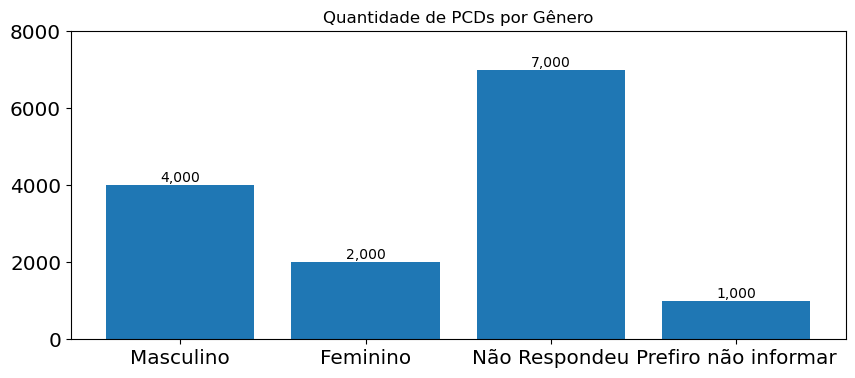

In [89]:
ge = ['Masculino', 'Feminino', "Não Respondeu", 'Prefiro não informar']
dpcd = [4000, 2000, 7000, 1000]

fig, ax = plt.subplots()
bar_container = ax.bar(ge, dcpd)
ax.set(title='Quantidade de PCDs por Gênero', ylim=(0, 8000))
ax.bar_label(bar_container, fmt='{:,.0f}')

1.2 - Faixa Salarial Mulheres/PCD/Etnia

1.1.1 - As mulheres PCDs e Etnia acreditam que tem experiência Profissional afetada?

1.3 - Nível de Ensino Mulheres/PCD/Etnia